# THEORETICAL CONSIDERATIONS of Ju Yang doctor thesis

In [ ]:
import numpy as np

def hyperbolic_ratio(x):
    """
    Calculate (1-x)/(1+x) in a numerically stable way.
    """
    if abs(x) < 1e-10:  # Avoid division near singularity
        return 1 - 2 * x
    else:
        return np.exp(np.log1p(-x) - np.log1p(x))

def inverse_hyperbolic_ratio(x):
    """
    Calculate (1+x)/(1-x) in a numerically stable way.
    """
    if abs(x) < 1e-10:
        return 1 + 2 * x
    else:
        return np.exp(np.log1p(x) - np.log1p(-x))

def calculate_phi_degree(tau):
  return np.degrees(np.angle(tau))

In [ ]:
# Constants
## Permittivity
epsilon_s = 2.1  # Relative permittivity of sensor(Teflon)
epsilon_1 = 8.2  # Relative permittivity of resin
epsilon_2 = 1.0  # Relative permittivity of delamination layer

## Impedance
eta_0 = 377  # Air impedance (Ohms)
eta_s = eta_0 / np.sqrt(epsilon_s)  # Sensor impedance (Ohms)
print(eta_s)
#eta_s = 50  # Sensor impedance (Ohms)
eta_1 = 131.8  # Resin impedance (Ohms)
eta_2 = 377.0  # Delamination layer impedance (Ohms)

## Wave numbers
wavelength_0 = 15e-3  # Air wavelength (meters)
beta_0 = 2 * np.pi / wavelength_0  # Free space wave number
beta_1 = beta_0 * np.sqrt(epsilon_1)  # Resin layer wave number
beta_2 = beta_0 * np.sqrt(epsilon_2)  # Delamination layer wave number

## Layer thicknesses (meters)
t_0 = 0.2e-3  # Stand off thickness
t_1 = 0.7e-3  # Resin thickness
t_2 = 0  # Delamination thickness

260.1547158720675


In [ ]:
def calculate_tau(d0, d1, d2):
    """Calculate effective reflection coefficient tau."""
    # A: Delamination layer contribution
    tanbd = 1j * eta_2 / eta_1 * np.tan(beta_2 * d2)
    A = -hyperbolic_ratio(tanbd)

    # B: Resin layer contribution
    aexp2jbd = A * np.exp(-2 * 1j * beta_1 * d1)
    B = inverse_hyperbolic_ratio(aexp2jbd)

    # C: Air layer contribution
    etaB = eta_1 / eta_0 * B
    C = -hyperbolic_ratio(etaB)

    # D: Standoff distance contribution
    cexp2jbd = C * np.exp(-2 * 1j * beta_0 * d0)
    D = inverse_hyperbolic_ratio(cexp2jbd)

    # Effective reflection coefficient tau
    etaD = eta_0 / eta_s * D
    tau = -hyperbolic_ratio(etaD)
    return tau

In [ ]:
# グラフ描画用のリスト
t_values = np.linspace(0, 200e-6, 100)  # t: 0 から 200 um
phi_values = []
phi_values_2 = []
phi_values_3 = []

# tごとにtauを計算
for t in t_values:
    # パターン1: 剥離層 t だけスタンドオフ距離が狭まる（ICが膨れる）場合
    d0 = t_0 - t
    d1 = t_1
    d2 = t
    tau = calculate_tau(d0, d1, d2)
    phi = np.degrees(np.angle(tau))  # tauの位相（角度）を取得
    phi_values.append(phi)

    # パターン2: 剥離がなく，スタンドオフ距離が狭まる（ICが膨れる）場合
    d0 = t_0 - t
    d1 = t_1 + t
    d2 = 0
    tau_2 = calculate_tau(d0, d1, d2)
    phi_2 = np.degrees(np.angle(tau_2))
    phi_values_2.append(phi_2)

    # パターン3: 剥離層 t だがスタンドオフ距離が一定（ICが膨れない）場合
    d0 = t_0
    d1 = t_1 - t
    d2 = t
    tau_3 = calculate_tau(d0, d1, d2)
    phi_3 = np.degrees(np.angle(tau_3))
    phi_values_3.append(phi_3)

phi_values = phi_values[0] - phi_values
phi_values_2 = phi_values_2[0] - phi_values_2
phi_values_3 = phi_values_3[0] - phi_values_3
print("t = 100")
print("model1 =", phi_values[10])
print("model2 =", phi_values_2[10])
print("model3 =", phi_values_3[10])

t = 100
model1 = 1.1411154234696568
model2 = 1.144107391375499
model3 = -0.0028865003264115785


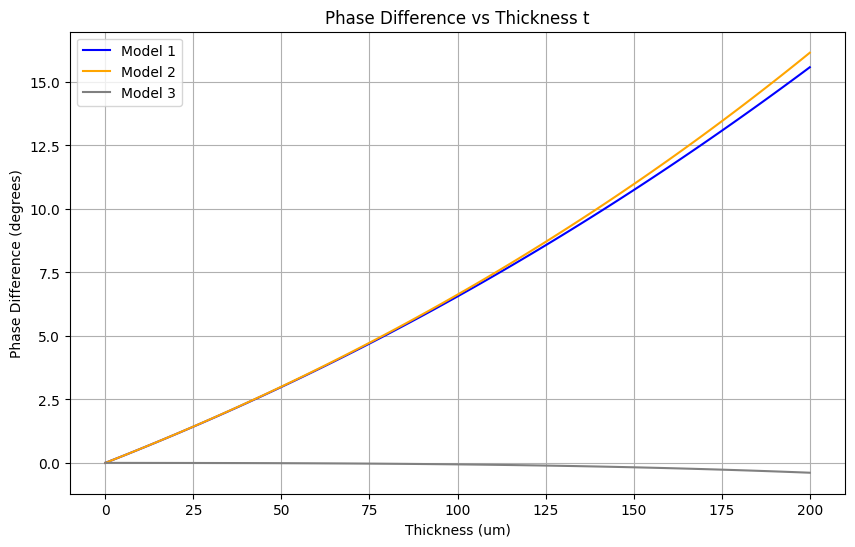

In [ ]:
import matplotlib.pyplot as plt
# グラフ描画
plt.figure(figsize=(10, 6))
plt.plot(t_values * 1e6, phi_values, label='Model 1', color='blue')
plt.plot(t_values * 1e6, phi_values_2, label='Model 2', color='orange')
plt.plot(t_values * 1e6, phi_values_3, label='Model 3', color='gray')
plt.title('Phase Difference vs Thickness t')
plt.xlabel('Thickness (um)')
plt.ylabel('Phase Difference (degrees)')
plt.grid(True)
plt.legend()
plt.show()